Display different steps of face landmarks matching and face swapping

In [1]:
import cv2
import matplotlib.pyplot as plt
from face_warper import face_warping, face_warp
from face_landmarks_extractor import MediapipeFaceLandmarksExtractor

Load images and detect landmarks

In [2]:
img_src = cv2.cvtColor(cv2.imread("images/image_3.jpg"), cv2.COLOR_BGR2RGB)
img_dest = cv2.cvtColor(cv2.imread("images/image_1.jpg"), cv2.COLOR_BGR2RGB)

In [3]:
landmarks_extractor = MediapipeFaceLandmarksExtractor(max_num_faces=1)
# landmarks_extractor = DlibLandmarksExtractor(device="cuda")

In [4]:
landmarks = landmarks_extractor(img_src)["face_landmarks"][0].landmarks
landmarks_dest = landmarks_extractor(img_dest)["face_landmarks"][0].landmarks

In [5]:
res_dict = face_warping(
    img_src,
    img_dest,
    landmarks,
    landmarks_dest,
    add_background_landmarks=False
)

Source image

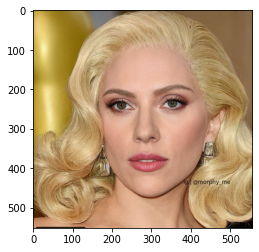

In [6]:
plt.imshow(img_src)

Source image with landmarks

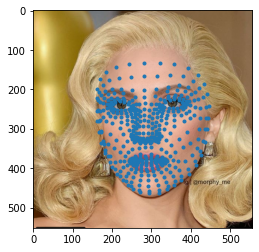

In [7]:
plt.imshow(img_src)
plt.scatter(landmarks[:, 0], landmarks[:, 1], marker=".")

Destination image

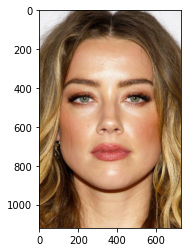

In [8]:
plt.imshow(img_dest)

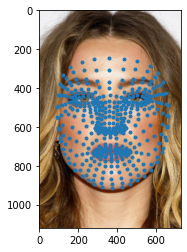

In [9]:
plt.imshow(img_dest)
plt.scatter(landmarks_dest[:, 0], landmarks_dest[:, 1], marker=".")

Copy-paste source face to destination face without poisson blending

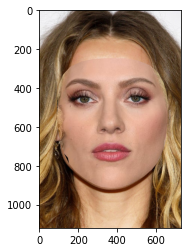

In [10]:
plt.imshow(res_dict["warp"])

Copy-paste source face to destination face with poisson blending

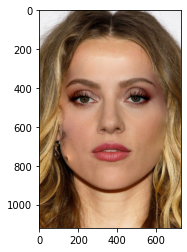

In [11]:
plt.imshow(res_dict["blend"])

In [12]:
warp_res = face_warp(
    img_src,
    img_dest,
    landmarks,
    landmarks_dest,
)

Source image transformed to match the destination image's face landmarks

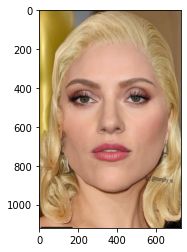

In [13]:
plt.imshow(warp_res["original_warp"])

Copy-paste source face to destination face with poisson blending

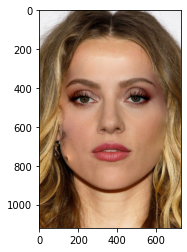

In [14]:
plt.imshow(warp_res["dest_warp"])